In [119]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


# Data analysis

In [120]:
%pwd

'/tmp'

In [121]:
%cp /content/drive/MyDrive/Colab/pydomains/data/domain_min.zip /tmp

In [122]:
%cd /tmp

/tmp


In [123]:
!unzip domain_min.zip

Archive:  domain_min.zip
replace domain_min.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: domain_min.csv          


In [ ]:
# !gzip -d shallalist.gz

In [124]:
!wc -l domain_min.csv

55711 domain_min.csv


In [125]:
df = pd.read_csv('domain_min.csv')

In [126]:
df.head()

,text,domain_names,cat_name
0,dozen assorted chip chocolate deluxe lucky med...,kizito,shopping
1,actually angrily captain dont go hah khan let ...,rule--34.blogspot,porn
2,campus chapel duke faith graduate group hill l...,agapeharvestchurch,religion
3,ce domain domain sale,freiheits-partei,politics
4,accessibility additional agent authority autho...,westernunion.co,finance


In [127]:
df = df.fillna('')

In [128]:
df['cat_name'].unique()

array(['shopping', 'porn', 'religion', 'politics', 'finance',
       'automobile', 'forum', 'gamble', 'news', 'recreation', 'hobby',
       'models', 'education', 'music', 'hacking', 'radiotv', 'redirector',
       'science', 'drugs', 'downloads', 'hospitals', 'government',
       'warez', 'adv', 'movies', 'dating', 'jobsearch', 'webradio',
       'alcohol', 'imagehosting', 'spyware', 'military', 'homestyle',
       'webmail', 'library', 'fortunetelling', 'tracker', 'remotecontrol',
       'sex', 'violence', 'searchengines', 'aggressive', 'ringtones',
       'isp', 'urlshortener', 'socialnet', 'dynamic', 'webphone',
       'costtraps', 'podcasts', 'weapons', 'anonvpn', 'webtv',
       'updatesites'], dtype=object)

In [129]:
len(df['cat_name'].unique())

54

In [130]:
df.groupby('cat_name').count()

,text,domain_names
cat_name,,
adv,938,938
aggressive,88,88
alcohol,348,348
anonvpn,45,45
automobile,1740,1740
costtraps,44,44
dating,649,649
downloads,703,703
drugs,634,634


In [131]:
categories_less_than_100 = df.groupby('cat_name').count()[df.groupby('cat_name').count()['text'] < 100].index

In [132]:
categories_less_than_100

Index(['aggressive', 'anonvpn', 'costtraps', 'dynamic', 'library', 'military',
       'podcasts', 'remotecontrol', 'ringtones', 'updatesites', 'violence',
       'webphone', 'webtv'],
      dtype='object', name='cat_name')

In [133]:
# df = df.drop(df[df['category_names'].isin(categories_less_than_100)].index)

In [134]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [135]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [136]:
classes = df.groupby('cat_name').count().index

In [137]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64', name='category_codes')

In [138]:
df.loc[df['category_codes'] == 43]

,text,domain_names,cat_name,category_codes
160,es kor design future ha ne next partner previo...,flabs,spyware,43
682,bonny buy candy candy company customer digital...,adtraffic,spyware,43
857,actual agency agency average city community co...,funnytaf,spyware,43
1008,al con control el en explore leer posted skip ...,sicil,spyware,43
1101,exploring information main menu mobile powered...,eg-mobile,spyware,43
...,...,...,...,...
55110,bit activation address cad category client cli...,crackserialkeys,spyware,43
55154,baka caravan central cham either fruit gold im...,20shots,spyware,43
55191,important important id auto block bottom click...,shockcounter,spyware,43
55250,con imprint io lo login marketing mese policy ...,sessosubito,spyware,43


In [139]:
df.head()

,text,domain_names,cat_name,category_codes
0,dozen assorted chip chocolate deluxe lucky med...,kizito,shopping,41
1,actually angrily captain dont go hah khan let ...,rule--34.blogspot,porn,31
2,campus chapel duke faith graduate group hill l...,agapeharvestchurch,religion,35
3,ce domain domain sale,freiheits-partei,politics,30
4,accessibility additional agent authority autho...,westernunion.co,finance,11


In [140]:
df['domain_names'] + ' ' + df['text'] 

0        kizito dozen assorted chip chocolate deluxe lu...
1        rule--34.blogspot actually angrily captain don...
2        agapeharvestchurch campus chapel duke faith gr...
3                   freiheits-partei ce domain domain sale
4        westernunion.co accessibility additional agent...
                               ...                        
55705    filabrasileirodogs design development domain k...
55706    astro.elte astronomy central date department e...
55707    clarkjoneskarate remember caution control forg...
55708    inflagranti-music auto band bass die dance das...
55709    unsw.edu genius city kensington academic acces...
Length: 55710, dtype: object

In [141]:
len_of_text = df['text'].str.split("\\s+")

In [142]:
len_of_text.str.len().max()

36031

In [143]:
df.loc[df['cat_name'] == 'news']

,text,domain_names,cat_name,category_codes
9,advertise air almanac ann announce annual arm ...,wxra945,news,28
35,cest clubbing en franco grille infinity la lam...,radio.m24,news,28
40,pump misguiding administrator advice advocate ...,ariannaonline,news,28
42,amir barcelona booker candela camp candela cen...,rpctv,news,28
47,si account aura bongo bull chi classified con ...,giornaledellavela,news,28
...,...,...,...,...
55631,irene van covid net want agenda business berg ...,zwartewaterkrant,news,28
55636,burn slow fit en advertise allergy almost appl...,ecr.co,news,28
55654,back bolivia canal cash chapin costa delta die...,canal7.com,news,28
55688,chanson relax soft vibration vintage vibration de,vibrationfm,news,28


# Split Data

In [144]:
X = (df['domain_names'] + ' ' + df['text']).values
y = df['category_codes'].values

In [145]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [146]:
X_train.size

38997

In [147]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int8),
 array([ 686,   64,  249,   37, 1196,   33,  466,  495,  429,   11, 2624,
        2957,  223, 1483, 1136,  170,   97, 4560,   71,  576,  124,  204,
         961,   60,   55,  295, 1088, 1395, 3763,   34,  479, 1436, 1109,
        5899,  186, 1381,   12,   60,  356,  117,  173,  999,  101,  225,
          77,   11,   71,   21,  103,   96,  232,   12,  262,   37]))

In [148]:
X_rem.size

16713

In [149]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int8),
 array([ 252,   24,   99,    8,  544,   11,  183,  208,  205,    2, 1086,
        1281,  108,  638,  524,   93,   31, 1906,   31,  217,   56,   79,
         387,   23,   14,  118,  488,  690, 1552,    8,  217,  632,  469,
        2519,   80,  587,    4,   17,  155,   51,   63,  426,   55,   98,
          42,    8,   46,    5,   44,   59,  127,    6,  122,   15]))

In [150]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [151]:
X_val.size

8356

In [152]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53], dtype=int8),
 array([ 121,   11,   55,    3,  281,    6,   87,  100,  103,  543,  624,
          55,  314,  261,   39,   15,  941,   16,  107,   31,   43,  220,
           7,    9,   67,  251,  346,  770,    5,  103,  325,  230, 1279,
          44,  277,    2,    8,   68,   31,   34,  202,   29,   51,   22,
           3,   21,    1,   26,   28,   78,    1,   55,    7]))

In [153]:
X_test.size

8357

In [154]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int8),
 array([ 131,   13,   44,    5,  263,    5,   96,  108,  102,    2,  543,
         657,   53,  324,  263,   54,   16,  965,   15,  110,   25,   36,
         167,   16,    5,   51,  237,  344,  782,    3,  114,  307,  239,
        1240,   36,  310,    2,    9,   87,   20,   29,  224,   26,   47,
          20,    5,   25,    4,   18,   31,   49,    5,   67,    8]))

In [155]:
X_train[10000]

'climbing er month abigail account aching actually additionally advertise advice alison alpine already anchor article aspen avalanche become belay bend best beta better better better beyond bicycle big biggest bight boulder bouldering bowline bowline brain brown business cairn call campfire category check choose clean climb climber climbing climbing climbing close clove coach community complete continue control core could cove crack crash create creatine creek deal dean death debut dick difference different discover documentary dont double drone eating eight el elbow elbow endurance entertainment essential even event ever ever exclusive expand expert exploration explore fa family father feed figure film find finger first first fishing fix fly forever forever game gear german get gill girth go gorge great great guide gym gym healthy heather historically hitch housing ice idea improve increase indoor industry injury interactive jeff join joint journal knot knot know last late latest lead

In [156]:
y_train[10000]

33

In [157]:
df[df['domain_names'].str.contains('bmwparklane')]

,text,domain_names,cat_name,category_codes
33750,making active address business book brand busi...,bmwparklane,automobile,4


In [158]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [159]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# Creating Dataset

In [160]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [161]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [162]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'vomblaurasen oh ar anchorage best boston buffalo ca champion city club colorado colorado counter de dog ethics ga gallery german group hi hit international island jersey kennel la lake las mi mo michigan montana ne north northern oh one pa photo previously phoenix present russia sale salt san south st tristate ut wa wi wy west youth york york adult also area balanced best breed breeder code compete complete conformation correct counter dogs done enter everyday family feel find get good health homework known last many occasionally part people puppy puppy put registered registration review sale sale several show showing standing style suspended suspended take tell temperament thing training well whether working young', shape=(), dtype=string)
Label tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(54,), dtype=float32)


# Vectorization

In [163]:
max_features = 50000
sequence_length = 5000

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [164]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [165]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [166]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 5000), dtype=int64, numpy=array([[37565,  1303,  2004, ...,     0,     0,     0]])>, <tf.Tensor: shape=(54,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>)


In [167]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  benefit
Vocabulary size: 50000


In [168]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [169]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [62]:
embedding_dim = 256 # tested with 64
weight_decay = 0.00001

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150,
                        activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=weight_decay, l2=weight_decay),
                        bias_regularizer=regularizers.L2(weight_decay),
                        activity_regularizer=regularizers.L2(weight_decay)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 256)         12800256  
                                                                 
 dropout_6 (Dropout)         (None, None, 256)         0         
                                                                 
 global_average_pooling1d_2   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               38550     
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                      

In [170]:
embedding_dim = 64 # tested with 64

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          3200064   
                                                                 
 dropout_11 (Dropout)        (None, None, 64)          0         
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 54)                3510      
                                                                 
Total params: 3,203,574
Trainable params: 3,203,574
Non-trainable params: 0
____________________________________________

In [171]:
model_save_filename = "model.h5"

In [172]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.001



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [173]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
606/610 [============================>.] - ETA: 0s - loss: 3.2352 - accuracy: 0.1438
Epoch 1: val_accuracy improved from -inf to 0.15306, saving model to model.h5
610/610 [==============================] - 7s 10ms/step - loss: 3.2353 - accuracy: 0.1439 - val_loss: 3.1244 - val_accuracy: 0.1531 - lr: 0.0010
Epoch 2/500
607/610 [============================>.] - ETA: 0s - loss: 3.1136 - accuracy: 0.1510
Epoch 2: val_accuracy did not improve from 0.15306
610/610 [==============================] - 6s 10ms/step - loss: 3.1139 - accuracy: 0.1511 - val_loss: 3.1185 - val_accuracy: 0.1529 - lr: 1.0000e-03
Epoch 3/500
607/610 [============================>.] - ETA: 0s - loss: 3.1088 - accuracy: 0.1507
Epoch 3: val_accuracy did not improve from 0.15306
610/610 [==============================] - 6s 10ms/step - loss: 3.1092 - accuracy: 0.1508 - val_loss: 3.1126 - val_accuracy: 0.1529 - lr: 9.9999e-04
Epoch 4/500
607/610 [============================>.] - ETA: 0s - loss: 3.1015 - accura

# Evaluate

In [174]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

131/131 [==============================] - 0s 3ms/step - loss: 1.7018 - accuracy: 0.6012
Loss:  1.7018358707427979
Accuracy:  0.601172685623169


# Confusion Matrix

In [175]:
test_txt = []
test_labels = []

for txt, label in test_ds:
  for t in txt:
    test_txt.append(t.numpy())
  for l in label:
    test_labels.append(l.numpy())

In [176]:
len(test_txt)

8357

In [177]:
len(test_labels)

8357

In [178]:
len(test_txt[0])

5000

In [179]:
len(test_labels[0])

54

In [180]:
test_txt = np.array(test_txt)
test_labels = np.array(test_labels)

In [181]:
predicted = model.predict(test_txt)

In [182]:
len(predicted)

8357

In [183]:
y_pred = np.argmax(predicted, axis=1)
y_true = np.argmax(test_labels, axis=1)

In [184]:
test_acc = sum(y_pred == y_true) / len(y_true)

In [185]:
test_acc

0.6011726696182841

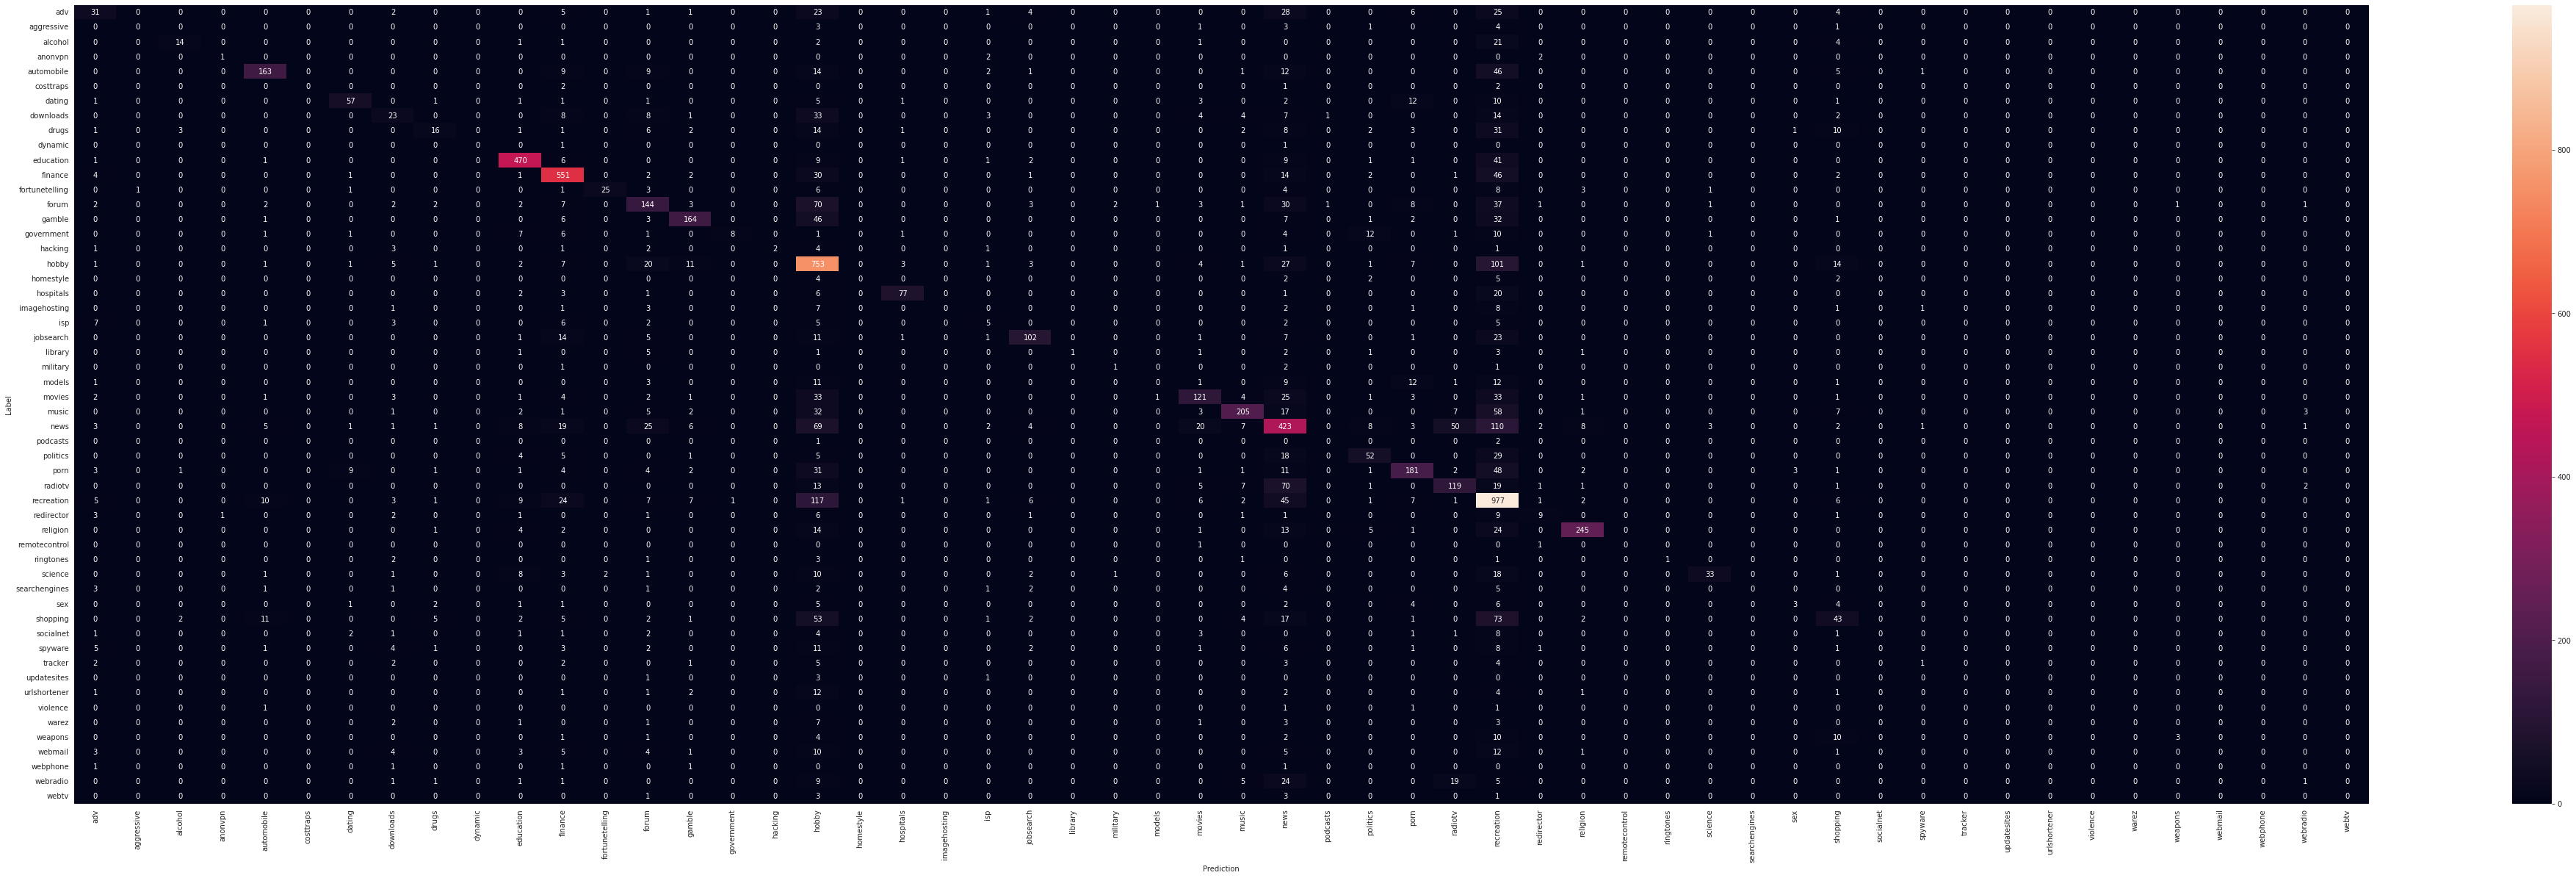

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(70, 20))
sns.set_style(style='white')

sns.heatmap(confusion_mtx,
            xticklabels=classes,
            yticklabels=classes,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Plot

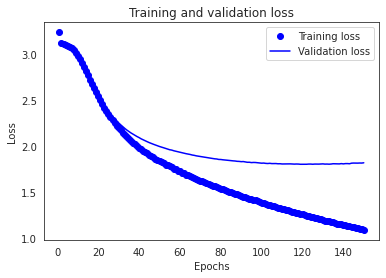

In [187]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

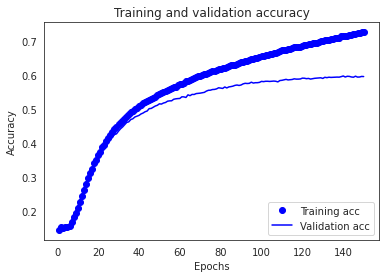

In [188]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [189]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

131/131 [==============================] - 1s 5ms/step - loss: 1.7018 - accuracy: 0.6012
0.601172685623169


# Inference

In [246]:
examples = [
    "yahoo.com",
    "forbes.com",
    "xvideos.com",
    "last.fm",
    "facebook.com",
    "bellesa.co",
    "marketwatch.com"
]


import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
most_common_words = ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service']


def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      # remove most common words
      tokens = [w for w in tokens if not w in most_common_words]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  print(f"{examples[i]}")
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
yahoo.com
forbes.com
xvideos.com
last.fm
facebook.com
bellesa.co
marketwatch.com


In [247]:
examples

['yahoo yesterday mail tomorrow phoenix advertise today politics health final oxygen life style shopping video twitter technology libra business sagittarius finance weather cancer celebrity entertainment science wed feedback prevention sports scoreboard',
 'forbes advisor style media store retirement purple transportation advertise cloud leadership latest retail innovation business breaking featured education popular ai subscribe energy dining travel policy chewy gear money video science dell explore',
 'xvideos black gapes straight aunt casting dutch chubby blonde account squirting movie amateur anal fisting lingerie history cuckold oiled brunette next teen solo mature german advertising beach shower caught rough cheating redhead gay compilation interracial ass teacher',
 'last next play reset live back twitter close reload music account subscribe previous company dismiss merchandise',
 'facebook messenger portal oculus press alt watch bulletin local',
 'bellesa rough orgy bondage ana

In [248]:
results = export_model.predict(examples)

In [249]:
probs = tf.nn.softmax(results)

In [250]:
probs[3]

<tf.Tensor: shape=(54,), dtype=float32, numpy=
array([0.0184567 , 0.01820027, 0.01823984, 0.01817751, 0.01830662,
       0.01819668, 0.01825878, 0.01870288, 0.01825708, 0.01817706,
       0.0186675 , 0.01879433, 0.01824152, 0.01855143, 0.01846186,
       0.01822242, 0.01820407, 0.01930553, 0.0182012 , 0.01820387,
       0.01827014, 0.01828862, 0.01833673, 0.01819813, 0.01818425,
       0.0183834 , 0.01909332, 0.0218111 , 0.02149339, 0.01819741,
       0.01832465, 0.01871821, 0.02032631, 0.0188651 , 0.01827597,
       0.01836917, 0.0181714 , 0.01826331, 0.0182609 , 0.01824551,
       0.01822697, 0.01850034, 0.01825393, 0.01830231, 0.01820741,
       0.01817301, 0.01821941, 0.01818052, 0.01827659, 0.01818961,
       0.01840311, 0.01817366, 0.01876549, 0.01822346], dtype=float32)>

In [251]:
res_args = tf.argmax(results, 1)

In [252]:
res_args

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([28, 28, 31, 27, 28, 31, 28])>

In [253]:
res_args.numpy()

array([28, 28, 31, 27, 28, 31, 28])

In [254]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [255]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : news
forbes : news
xvideos : porn
last : music
facebook : news
bellesa : porn
marketwatch : news


# Export Model

In [256]:
export_model.save('saved_model/piedomains')

INFO:tensorflow:Assets written to: saved_model/piedomains/assets


In [257]:
!ls -ltr

total 108908
lrwxrwxrwx 1 root root       61 May  3 17:49 dap_multiplexer.INFO -> dap_multiplexer.647b6351bc90.root.log.INFO.20220503-174918.61
srwxr-xr-x 1 root root        0 May  3 17:49 debugger_lmi2y91pb
-rw-r--r-- 1 root root     1515 May  3 17:49 dap_multiplexer.647b6351bc90.root.log.INFO.20220503-174918.61
srw------- 1 root root        0 May  3 17:56 drivefs_ipc.0
srw------- 1 root root        0 May  3 17:56 drivefs_ipc.0_shell
drwx------ 2 root root     4096 May  3 17:56 initgoogle_syslog_dir.0
lrwxrwxrwx 1 root root       73 May  3 17:56 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.647b6351bc90.root.log.INFO.20220503-175609.287
drwxr-xr-x 3 root root     4096 May  3 17:56 python-languageserver-cancellation
-rw-r--r-- 1 root root     1565 May  3 17:56 directoryprefetcher_binary.647b6351bc90.root.log.INFO.20220503-175609.287
drwx------ 2 root root     4096 May  3 17:56 pyright-296-GyVTPLpJKMmV
drwx------ 2 root root     4096 May  3 17:56 pyright-296-Bc8zLrT9Nd8E

In [ ]:
!zip model_min.h5.zip model.h5

  adding: model.h5 (deflated 11%)


In [ ]:
%cp /tmp/model_min.h5.zip /content/drive/MyDrive/Colab/pydomains/data/

# Load and test model

In [ ]:
%cp /content/drive/MyDrive/Colab/pydomains/data/model_min.h5.zip /tmp

In [ ]:
%cd /tmp

/tmp


In [ ]:
%ls

dap_multiplexer.1c73ce20a50d.root.log.INFO.20220429-181545.61
dap_multiplexer.INFO@
debugger_kijlbndrg=
directoryprefetcher_binary.1c73ce20a50d.root.log.INFO.20220429-184434.286
directoryprefetcher_binary.INFO@
drivefs_ipc.0=
drivefs_ipc.0_shell=
initgoogle_syslog_dir.0/
model_min.h5.zip
pyright-293-lvVMzdbaprr4/
pyright-293-QcA869HiF1kK/
python-languageserver-cancellation/


In [ ]:
!unzip model_min.h5.zip

Archive:  model_min.h5.zip
replace model.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: model.h5                


In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  loaded_model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

In [ ]:
examples = [
    "yahoo.com",
    "forbes.com",
    "draftkings.com/",
    "pornhub.com",
    "xvideos.com",
    "google.com",
    "amazon.com",
    "facebook.com",
    "fidelity.com",
    "youtube.com",
    "youporn.com",
    "bellesa.co",
    "medium.com",
    "khanacademy.org"
]


import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
examples

['yahoo news technology weather feedback politics quartz style home search entertainment help shopping business science mon twitter tue sagittarius health today colorado scoreboard celebrity finance tomorrow advertise sun boston mail cancer libra life yesterday sports',
 'forbes education breaking policy video science transportation dell advertise leadership retirement innovation explore store subscribe retail dining latest featured cloud advisor gear ai money media purple popular style travel business energy privacy chewy',
 'draftkings ',
 'pornhub bondage white content march feedback masturbation resend home free press advertise pussy festival angel information yesterday amateur sex explore orientation exclusive community discover random roommate premium dutch upgrade next anal cartoon ebony threesome hot ass mobile sinner login verify popular public access cancel black dick mature gay',
 'xvideos fisting chubby movie lingerie account squirting blonde amateur straight interracial ro

In [ ]:
results = export_model.predict(examples)

In [ ]:
probs = tf.nn.softmax(results)

In [ ]:
probs[0]

<tf.Tensor: shape=(44,), dtype=float32, numpy=
array([0.0227703 , 0.02221854, 0.02221562, 0.02251638, 0.02363018,
       0.02235843, 0.0247606 , 0.02243242, 0.02220704, 0.02226515,
       0.02231406, 0.02221736, 0.02529181, 0.02239958, 0.02220788,
       0.02233155, 0.02383332, 0.02220798, 0.022687  , 0.0223076 ,
       0.02235214, 0.02280312, 0.02335867, 0.02351029, 0.02450513,
       0.02221411, 0.02310789, 0.02289109, 0.0235607 , 0.02236189,
       0.02221951, 0.02242399, 0.02226871, 0.02229819, 0.02231557,
       0.02294732, 0.02239881, 0.02263615, 0.02222114, 0.02223643,
       0.02278743, 0.02222195, 0.0226041 , 0.0225829 ], dtype=float32)>

In [ ]:
res_args = tf.argmax(results, 1)

In [ ]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : forum
forbes : news
draftkings : recreation
pornhub : porn
xvideos : porn
google : recreation
amazon : recreation
facebook : recreation
fidelity : recreation
youtube : recreation
youporn : porn
bellesa : porn
medium : recreation
khanacademy : recreation


In [ ]:
labels = []
domain_probs = []

for i in range(len(examples)):
    labels.append(classes[res_args[i]])
    domain_probs.append(np.around(probs[i][res_args[i]] * 100))

In [ ]:
labels

['forum',
 'news',
 'recreation',
 'porn',
 'porn',
 'recreation',
 'recreation',
 'recreation',
 'recreation',
 'recreation',
 'porn',
 'porn']

In [ ]:
domain_probs

[3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

In [ ]:
export_model.save('/content/drive/MyDrive/Colab/pydomains/data/saved_model/newpydomains')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/pydomains/data/saved_model/newpydomains/assets


In [ ]:
classes

Index(['adv', 'aggressive', 'alcohol', 'automobile', 'chat', 'dating',
       'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'hospitals', 'imagehosting', 'isp', 'jobsearch', 'models', 'movies',
       'music', 'news', 'politics', 'porn', 'radiotv', 'recreation',
       'redirector', 'religion', 'ringtones', 'science', 'searchengines',
       'sex', 'shopping', 'socialnet', 'spyware', 'tracker', 'urlshortener',
       'warez', 'weapons', 'webmail', 'webradio'],
      dtype='object', name='category_names')

In [ ]:
!rm -rf /tmp/saved_model/

In [ ]:
export_model.save('/tmp/saved_model/newpydomains')

INFO:tensorflow:Assets written to: /tmp/saved_model/newpydomains/assets


In [ ]:
cd /tmp 

/tmp


In [ ]:
%ls

__autograph_generated_file06y0qpw3.py
__autograph_generated_file_8ls128h.py
__autograph_generated_filedzt3yt4j.py
__autograph_generated_filegydvf2dw.py
__autograph_generated_filejaso9soo.py
__autograph_generated_fileo9yxhwob.py
__autograph_generated_filepkulqjfd.py
__autograph_generated_fileqi5zzirv.py
__autograph_generated_fileqix0fblf.py
__autograph_generated_filesv9432ec.py
__autograph_generated_filew5v40kjt.py
__autograph_generated_filewt9jjvai.py
__autograph_generated_fileya331g2z.py
dap_multiplexer.1c73ce20a50d.root.log.INFO.20220429-181545.61
dap_multiplexer.INFO@
debugger_kijlbndrg=
directoryprefetcher_binary.1c73ce20a50d.root.log.INFO.20220429-184434.286
directoryprefetcher_binary.INFO@
domain_final.csv
domain_final.zip
drivefs_ipc.0=
drivefs_ipc.0_shell=
initgoogle_syslog_dir.0/
model.h5
model_min.h5.zip
__pycache__/
pyright-293-lvVMzdbaprr4/
pyright-293-QcA869HiF1kK/
pyright-7607-6tNFFaCEcZor/
pyright-7607-KBPcU8NVrFx3/
python-languageserver-cancellation/
saved_model/
saved_

In [261]:
%cd /tmp

/tmp


In [259]:
%ls

piedomains/


In [ ]:
!zip -r saved_model_v2.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/piedomains/ (stored 0%)
  adding: saved_model/piedomains/saved_model.pb (deflated 71%)
  adding: saved_model/piedomains/variables/ (stored 0%)
  adding: saved_model/piedomains/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: saved_model/piedomains/variables/variables.index (deflated 63%)
  adding: saved_model/piedomains/keras_metadata.pb (deflated 90%)
  adding: saved_model/piedomains/assets/ (stored 0%)


In [262]:
!tar -czf shallalist_v2_model.tar.gz saved_model/

In [263]:
!du -sh shallalist_v2_model.tar.gz

34M	shallalist_v2_model.tar.gz


In [264]:
!cp shallalist_v2_model.tar.gz /content/drive/MyDrive/Colab/pydomains/models/

In [ ]:
!mkdir /content/drive/MyDrive/Colab/pydomains/models/